# Histogram visualizations

In [1]:
# Import data
import pandas as pd

data = pd.read_csv("../data/train.csv").sort_values('id')
x = data.loc[:, data.columns != 'price']
y = data['price'].values

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(feature, ranges, rows, columns, title=None, label=None, figsize=(15, 15)):
    # Create a figure with 3x3 subplots
    fig, axes = plt.subplots(rows, columns, figsize=figsize)
    if title:
        fig.suptitle(title, fontsize=16)

    # Flatten the 3x3 array of subplots for easier indexing
    axes = axes.flatten()

    mask = []
    for val in data[feature].values:
        for i in range(len(ranges) - 1):
            if val < ranges[i+1]:
                mask.append(i)
                break

    # Iterate over each availability range
    for i in range(len(ranges) - 1):
        # Handle listings with the specified amount of availability
        current_mask = [mask[j] == i for j in range(len(mask))]
        current_data = data[current_mask]['price']

        # Plot the histogram for the current availability range
        axes[i].hist(current_data, bins=np.arange(-0.5, 6.5, 1), color='skyblue', edgecolor='black')
        if label:
            axes[i].set_title(f'{label}: {ranges[i]} - {ranges[i+1]-1}')
        axes[i].set_xlabel('Price')
        axes[i].set_ylabel('Frequency')

    # Adjust layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.show()

### Separation by number of bedrooms

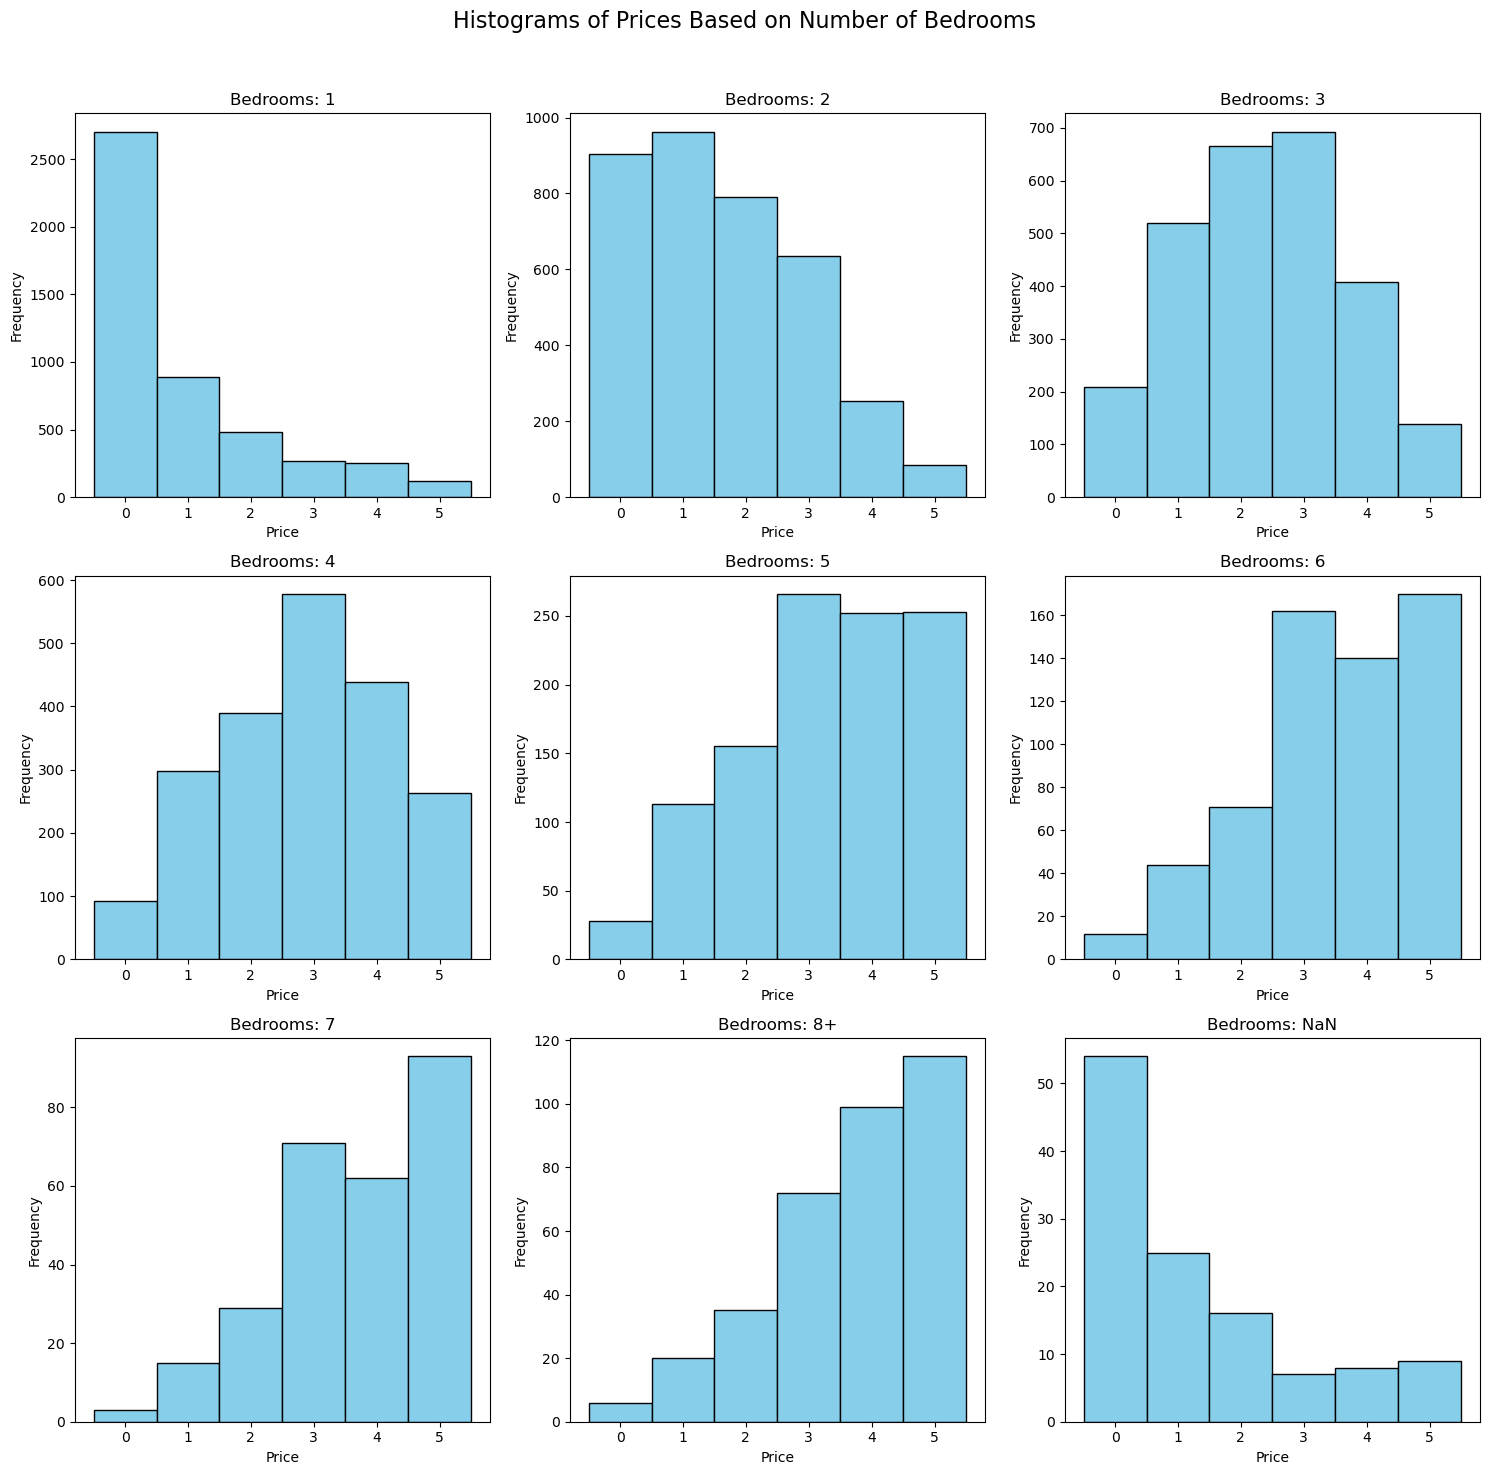

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a figure with 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Histograms of Prices Based on Number of Bedrooms', fontsize=16)

# Flatten the 3x3 array of subplots for easier indexing
axes = axes.flatten()

# Create a list to store the bedroom categories
bedroom_categories = list(range(1, 8)) + ['8+', 'NaN']

# Iterate over each bedroom category
for i, bedroom_category in enumerate(bedroom_categories):
    # Select data for the current bedroom category
    if bedroom_category == 'NaN':
        # Handle np.nan values
        current_data = data[data['beds'].isna()]['price']
    elif bedroom_category == '8+':
        # Handle listings with 8 or more bedrooms
        current_data = data[data['beds'] >= 8]['price']
    else:
        # Handle listings with the specified number of bedrooms
        current_data = data[data['beds'] == bedroom_category]['price']

    # Plot the histogram for the current bedroom category
    axes[i].hist(current_data, bins=np.arange(-0.5, 6.5, 1), color='skyblue', edgecolor='black')
    axes[i].set_title(f'Bedrooms: {bedroom_category}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

### Separation by accomodates

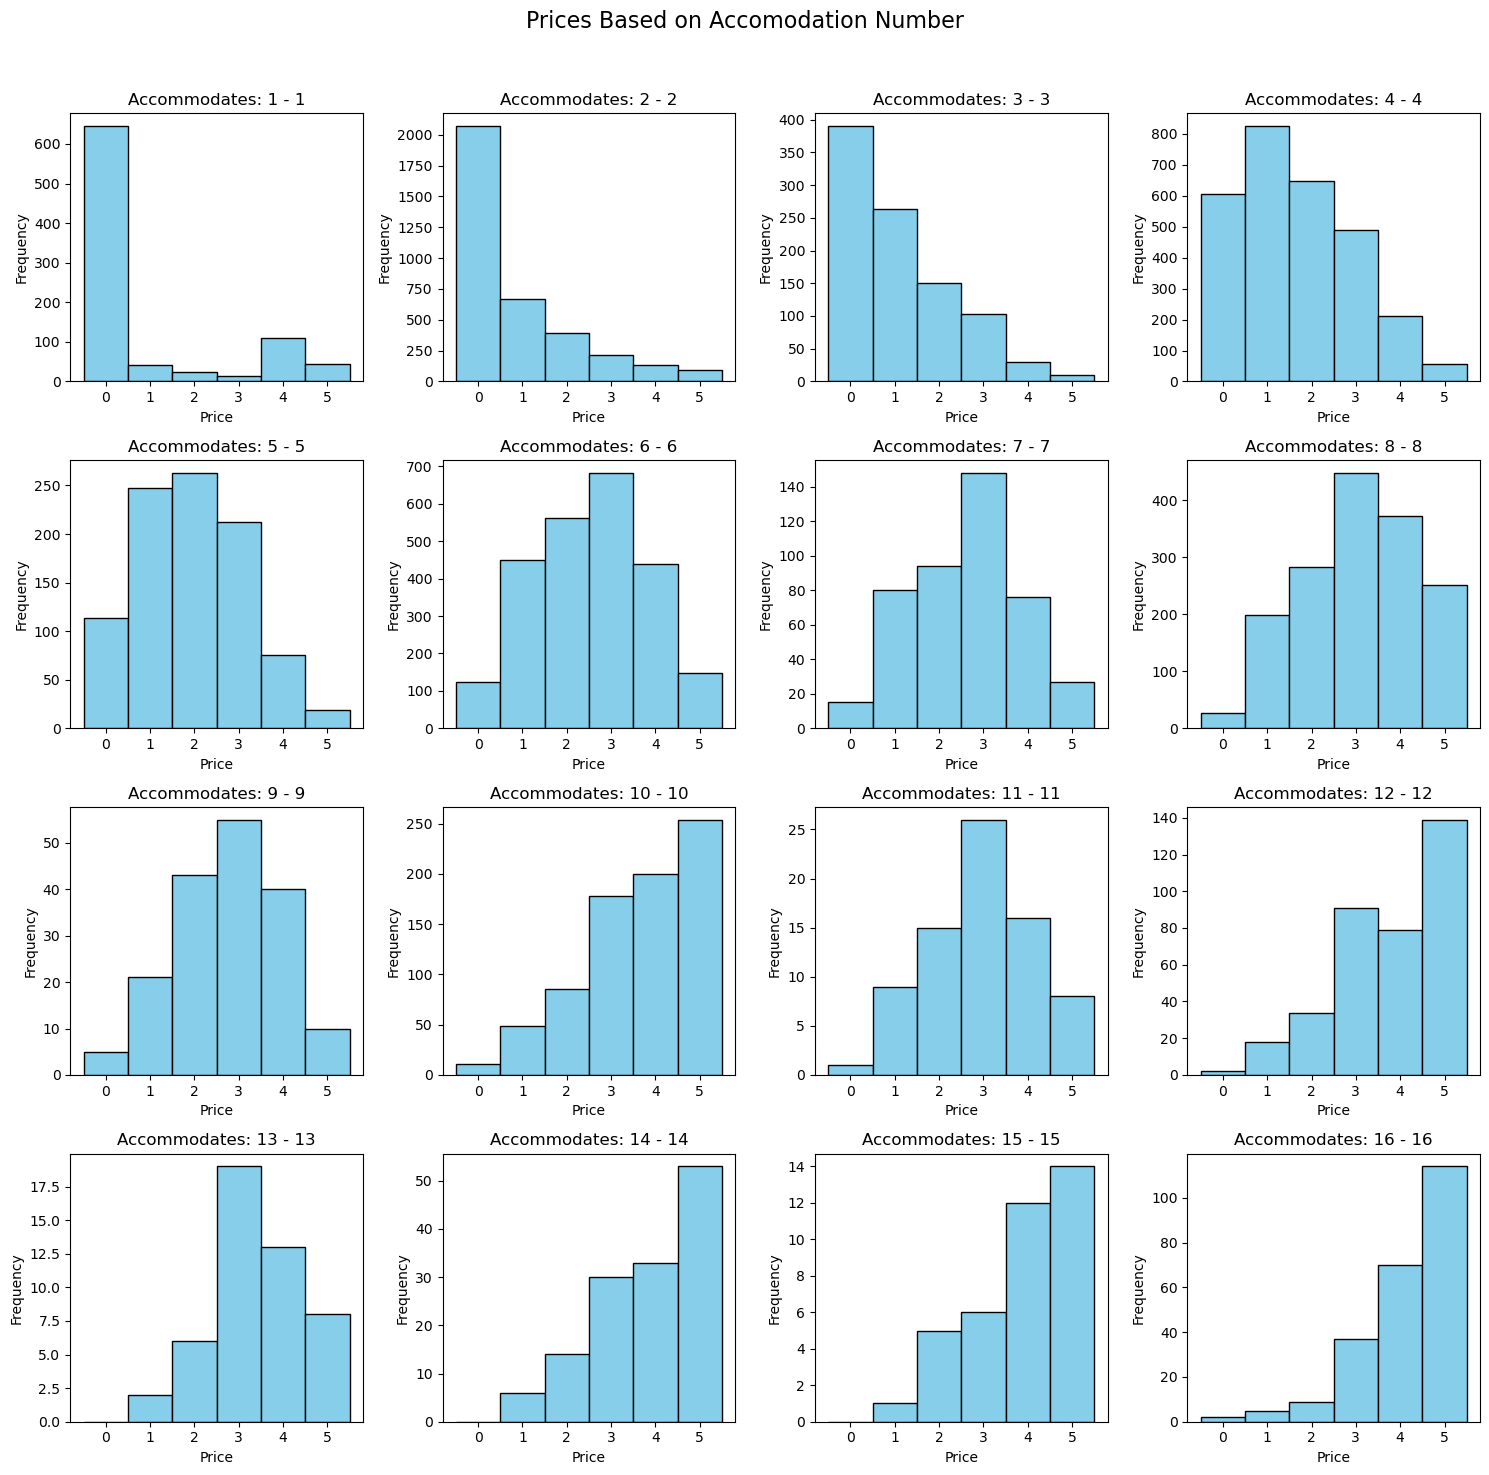

In [44]:
plot_histograms('accommodates', list(range(1, 18)), 4, 4, 
                'Prices Based on Accomodation Number', 'Accommodates')

### Separation by number of amenities

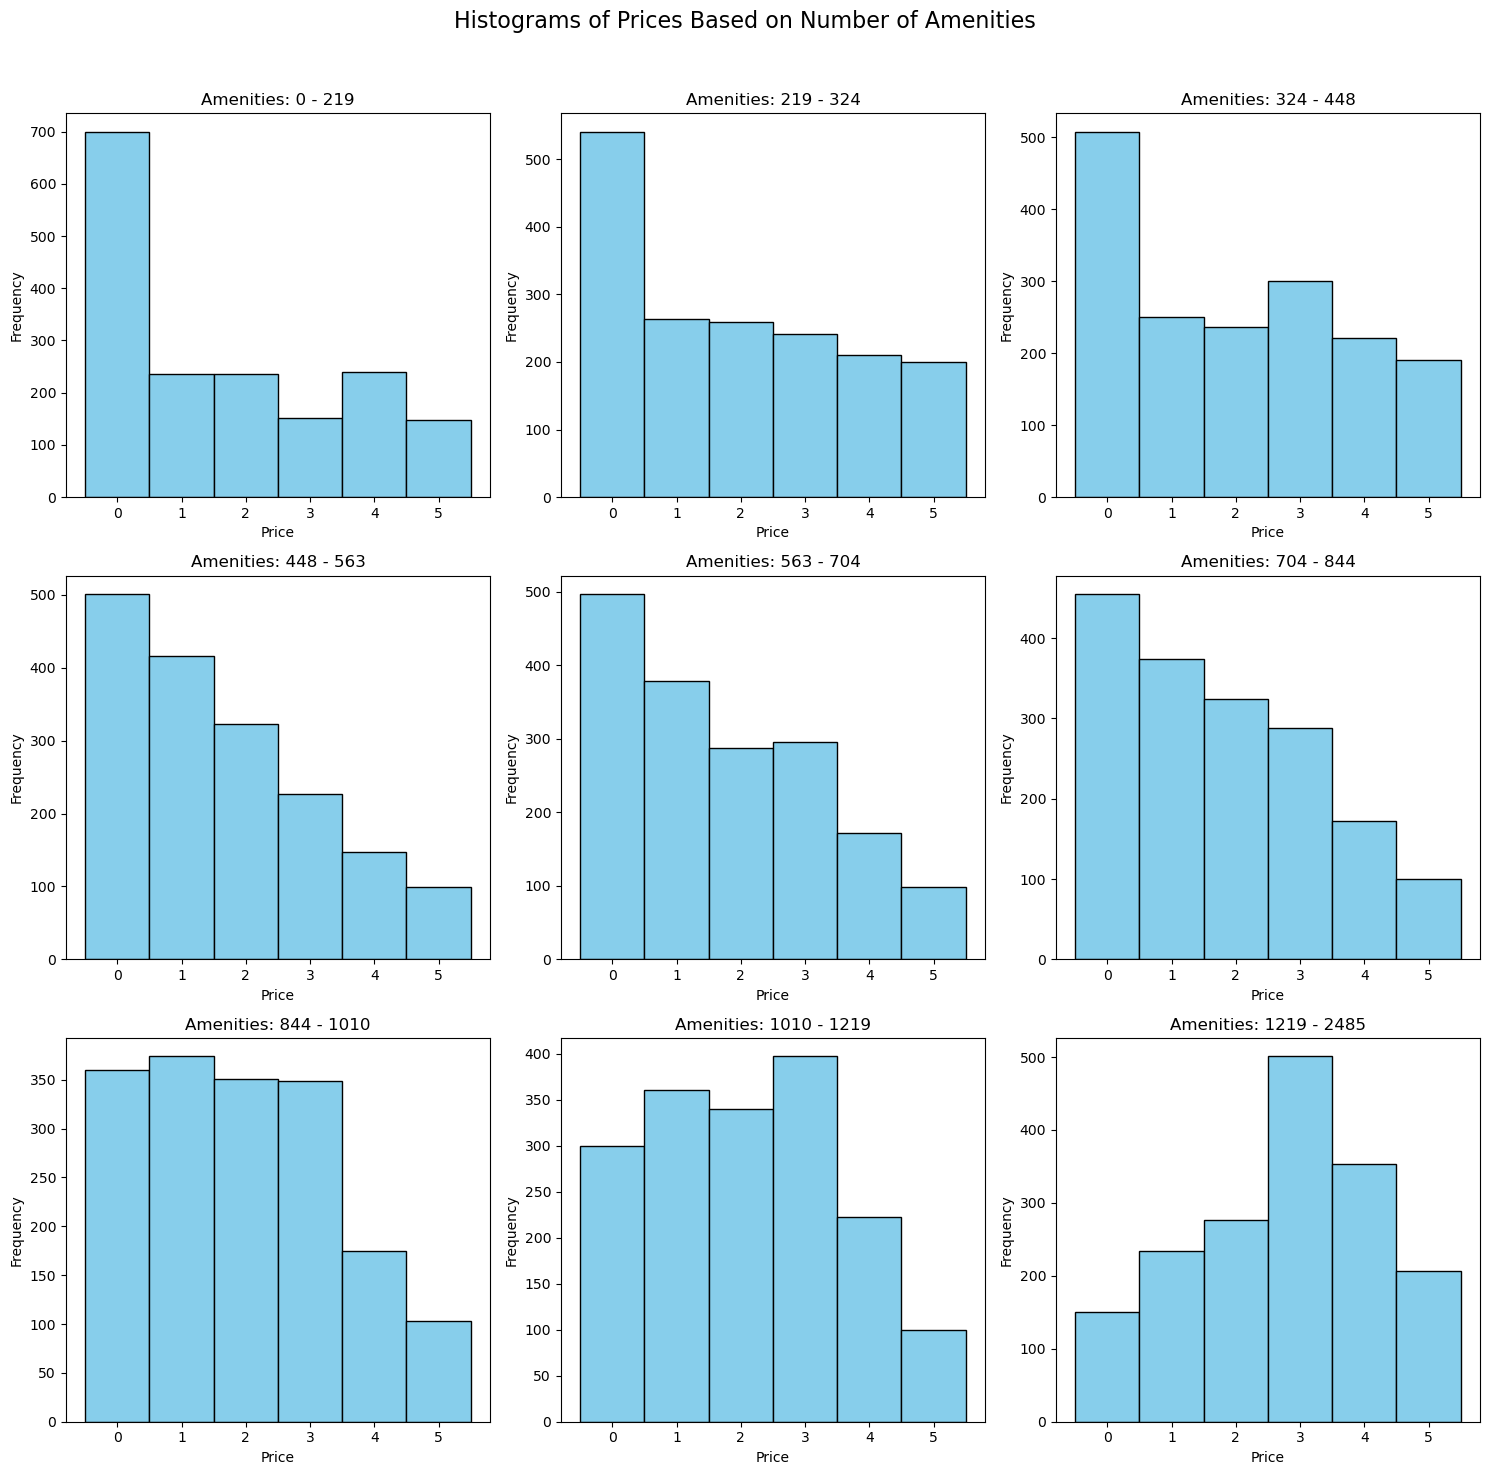

In [20]:

import matplotlib.pyplot as plt
import numpy as np

# Getting ranges for number of amenities
num_amen = list(set([len(amen) for amen in data['amenities'].values]))

counts = {}
for ele in data['amenities'].values:
    num = len(ele)
    if num not in counts:
        counts[num] = 0
    counts[num] += 1

ninths = [len(data) * i/9 for i in range(1,9)]
ranges = [0]

idx = 0
sum = counts[num_amen[0]]
for ninth in ninths:
    while sum < ninth:
        idx += 1
        sum += counts[num_amen[idx]]
    ranges.append(num_amen[idx])

ranges.append(max(num_amen) + 1)

# Create a figure with 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Histograms of Prices Based on Number of Amenities', fontsize=16)

# Flatten the 3x3 array of subplots for easier indexing
axes = axes.flatten()

mask = []
for val in data['amenities'].values:
    num = len(val)
    for i in range(len(ranges) - 1):
        if num < ranges[i+1]:
            mask.append(i)
            break

# Iterate over each range of number of amenities
for i in range(len(ranges) - 1):
    current_mask = [mask[j] == i for j in range(len(mask))]
    # Handle listings with the specified number of amenities
    current_data = data[current_mask]['price']

    # Plot the histogram for the current number of amenities
    axes[i].hist(current_data, bins=np.arange(-0.5, 6.5, 1), color='skyblue', edgecolor='black')
    axes[i].set_title(f'Amenities: {ranges[i]} - {ranges[i+1]}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

### Separation by availability

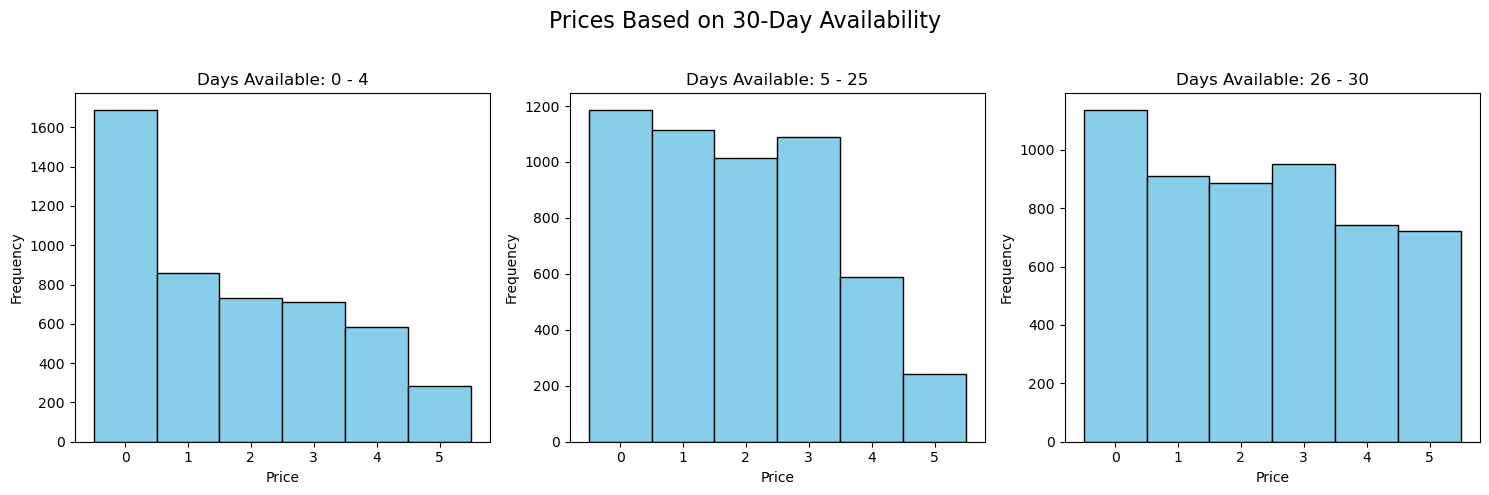

In [4]:
plot_histograms('availability_30', [0, 5, 26, 31], 1, 3,
                'Prices Based on 30-Day Availability', 'Days Available', (15, 5))

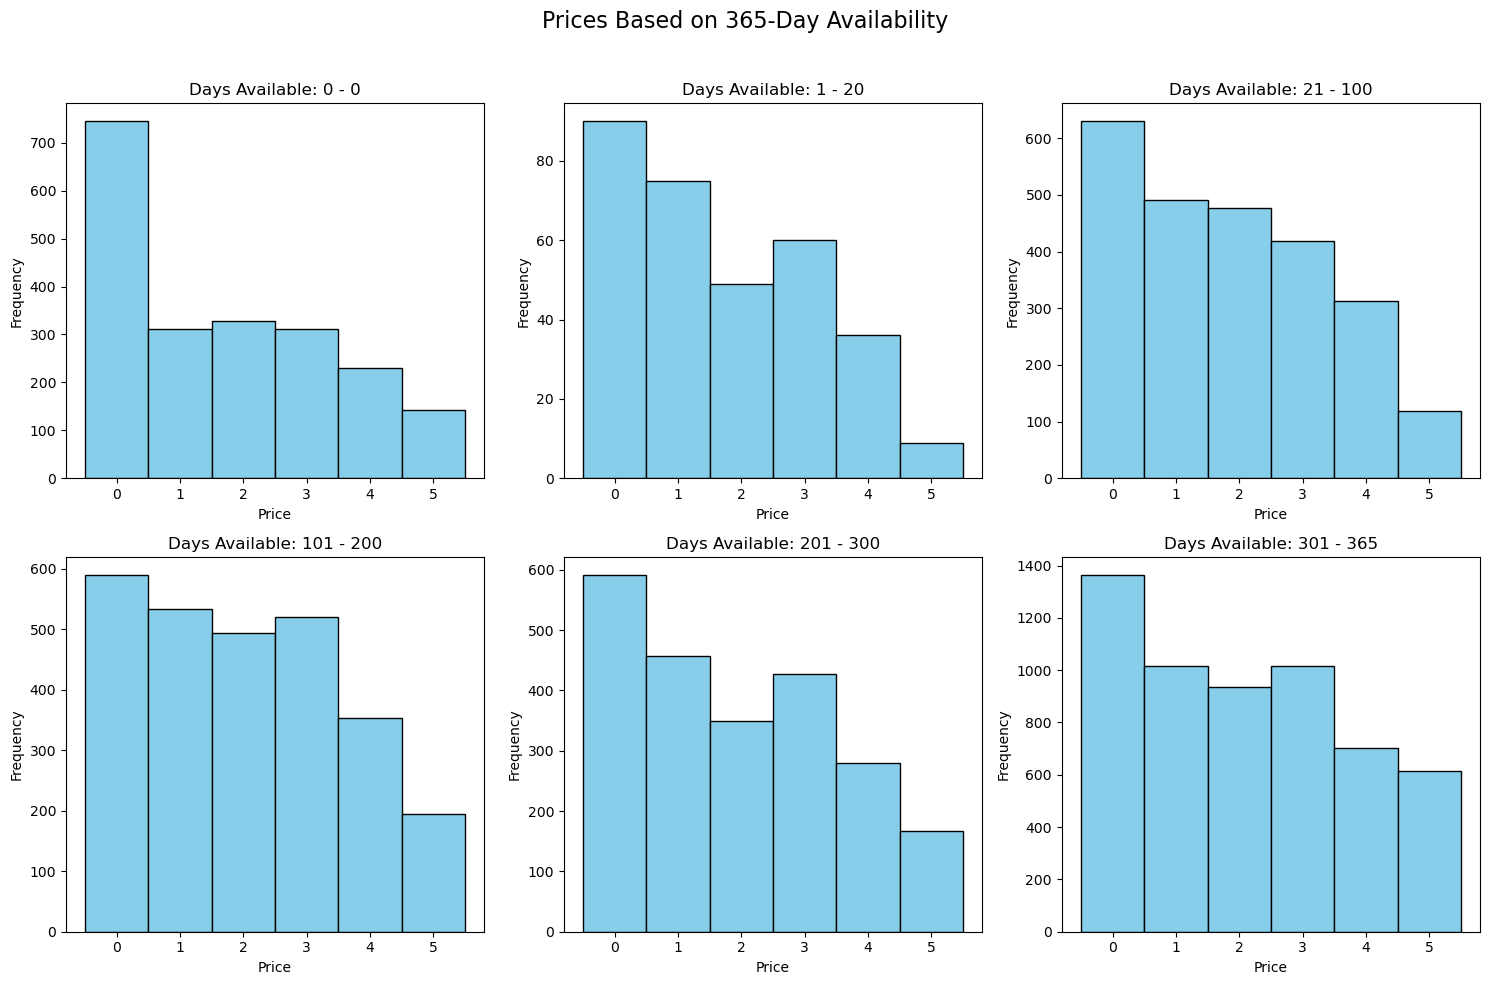

In [49]:
plot_histograms('availability_365', [0, 1, 21, 101, 201, 301, 366], 2, 3,
                'Prices Based on 365-Day Availability', 'Days Available', (15, 10))

### Separation by reviews

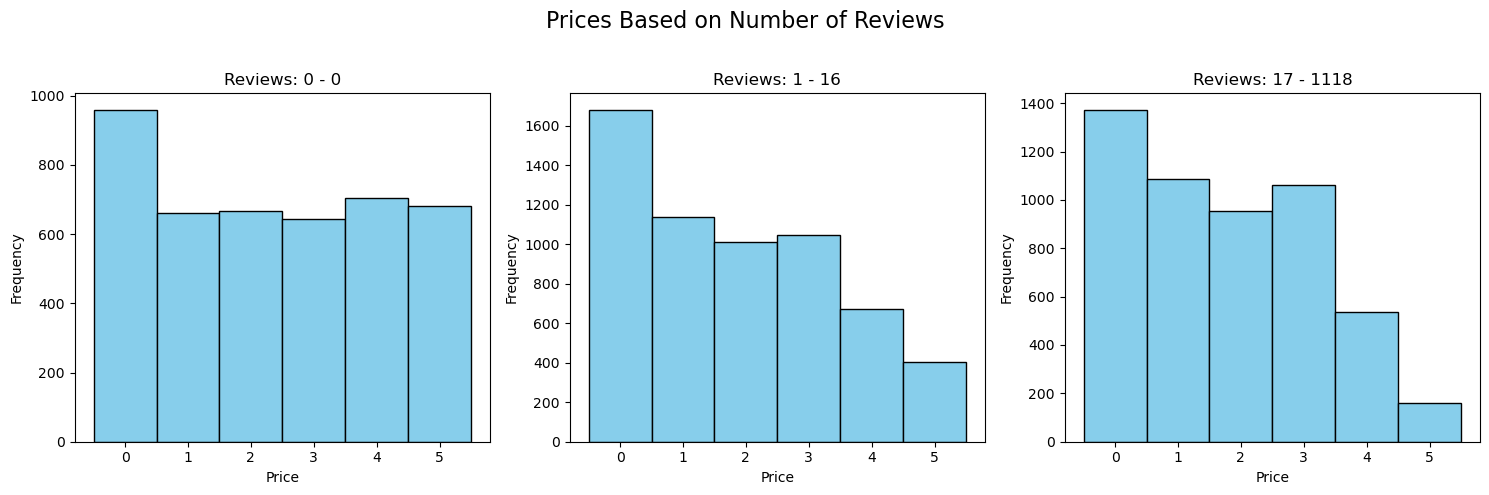

In [51]:
# Getting ranges for number of reviews
num_rev = list(set([int(amen) for amen in data['number_of_reviews'].values]))

counts = {}
for ele in data['number_of_reviews'].values:
    num = int(ele)
    if num not in counts:
        counts[num] = 0
    counts[num] += 1

thirds = [len(data) * i/3 for i in range(1,3)]
ranges = [0]

idx = 0
sum = counts[num_rev[0]]
for third in thirds:
    while sum < third:
        idx += 1
        sum += counts[num_rev[idx]]
    ranges.append(num_rev[idx])

ranges.append(max(num_rev) + 1)

# Plot Histograms
plot_histograms('number_of_reviews', ranges, 1, 3,
                'Prices Based on Number of Reviews', 'Reviews', (15, 5))

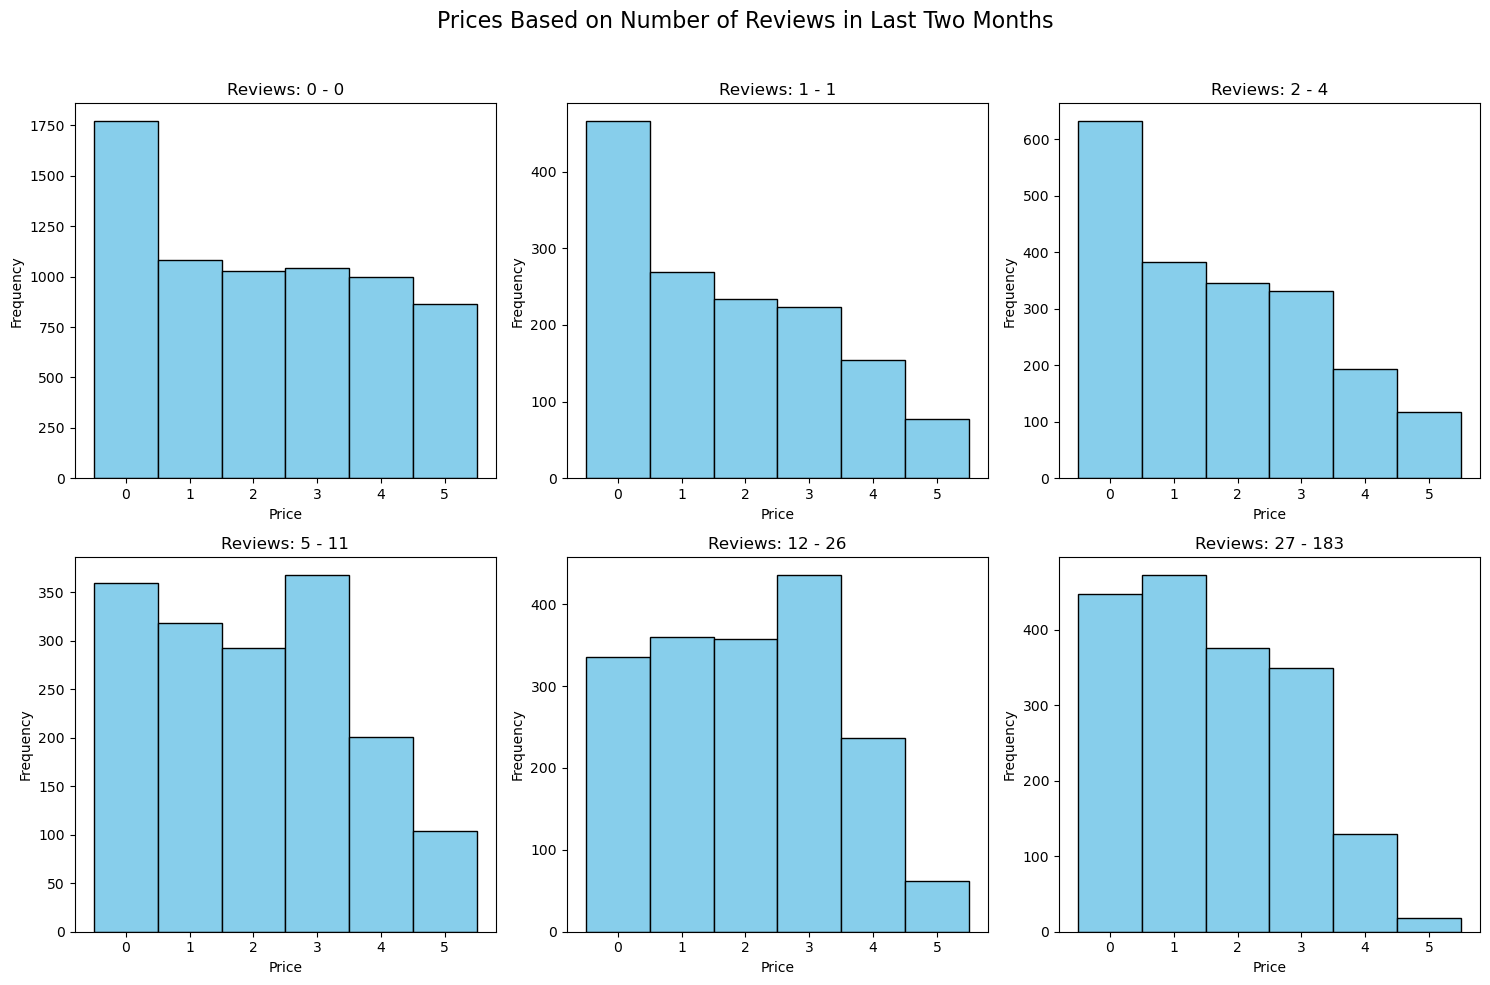

In [59]:
plot_histograms('number_of_reviews_ltm', [0, 1, 2, 5, 12, 27, 184], 2, 3,
                'Prices Based on Number of Reviews in Last Two Months', 'Reviews', (15, 10))